# Time series graphs of YoY% Change of HPI versus implied Turnover
## YoY = Year over Year
## Implied turnover = EHS/(Stocks/1000)

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Import the data that shows the total home sales per month in millions in the US beginning January 1999.
#Look at the data

HomeSales = pd.read_csv('./Existing_Home_Sales.csv')
print(HomeSales.info())
HomeSales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EOM     282 non-null    object 
 1   EHS     282 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB
None


,EOM,EHS
0,1/31/99,5.23
1,2/28/99,5.10
2,3/31/99,5.15
3,4/30/99,5.08
4,5/31/99,5.19


In [13]:
#Convert the EHS column to datetime

HomeSales['EOM'] = pd.to_datetime(HomeSales['EOM'])

In [14]:
# Rename the EOM column to Date

HomeSales['Date'] = HomeSales['EOM']

In [15]:
# Delete the old column claled EOM

HomeSales.drop('EOM', inplace=True, axis=1)

In [16]:
# Make new columns for the year, month

HomeSales["Month"] = pd.to_datetime(HomeSales['Date']).dt.month
HomeSales["Year"] = pd.to_datetime(HomeSales['Date']).dt.year

In [17]:
# Make a new column for the quarter:

HomeSales["Q"] = np.ceil(HomeSales["Month"]/3)

In [18]:
#Look at how recent the data is

HomeSales.tail()

,EHS,Date,Month,Year,Q
277,5.93,2022-02-28,2,2022,1.0
278,5.75,2022-03-31,3,2022,1.0
279,5.60,2022-04-30,4,2022,2.0
280,5.41,2022-05-31,5,2022,2.0
281,5.40,2022-06-30,6,2022,2.0


In [19]:
# The data that we have for the stocks ends in 2022 Q1, so let's truncate the 2022 Q2 data:

HomeSales = HomeSales.drop(labels=[279,280,281], axis=0)
HomeSales.tail()

,EHS,Date,Month,Year,Q
274,6.33,2021-11-30,11,2021,4.0
275,6.09,2021-12-31,12,2021,4.0
276,6.49,2022-01-31,1,2022,1.0
277,5.93,2022-02-28,2,2022,1.0
278,5.75,2022-03-31,3,2022,1.0


In [20]:
# Now import the Quarterly stock data
#Then look at only the colum HS_US

StockQuarterly = pd.read_csv('./Stock_Quarterly.csv')
StockQuarterly = StockQuarterly[['Year', 'Quarter', 'Unnamed: 17']]
print(StockQuarterly.info())
StockQuarterly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         93 non-null     int64
 1   Quarter      93 non-null     int64
 2   Unnamed: 17  93 non-null     int64
dtypes: int64(3)
memory usage: 2.3 KB
None


,Year,Quarter,Unnamed: 17
0,1999,1,79655
1,1999,2,80146
2,1999,3,80656
3,1999,4,80094
4,2000,1,80776


In [21]:
# Now we would like to get the aggregate Housing sales in each quarter and then add them to StockQuarterly:
#First we make a list that we will add

HomeSalesQuarterly_list = HomeSales.groupby(['Year', 'Q']).mean()['EHS'].tolist()

In [23]:
print(HomeSales.head(15))
print(HomeSales.tail(15))
HomeSalesQuarterly_list

     EHS       Date  Month  Year    Q
0   5.23 1999-01-31      1  1999  1.0
1   5.10 1999-02-28      2  1999  1.0
2   5.15 1999-03-31      3  1999  1.0
3   5.08 1999-04-30      4  1999  2.0
4   5.19 1999-05-31      5  1999  2.0
5   5.43 1999-06-30      6  1999  2.0
6   5.25 1999-07-31      7  1999  3.0
7   5.23 1999-08-31      8  1999  3.0
8   5.12 1999-09-30      9  1999  3.0
9   5.11 1999-10-31     10  1999  4.0
10  5.09 1999-11-30     11  1999  4.0
11  5.08 1999-12-31     12  1999  4.0
12  5.23 2000-01-31      1  2000  1.0
13  5.12 2000-02-29      2  2000  1.0
14  5.19 2000-03-31      3  2000  1.0
      EHS       Date  Month  Year    Q
264  6.65 2021-01-31      1  2021  1.0
265  6.17 2021-02-28      2  2021  1.0
266  6.04 2021-03-31      3  2021  1.0
267  5.96 2021-04-30      4  2021  2.0
268  5.92 2021-05-31      5  2021  2.0
269  5.97 2021-06-30      6  2021  2.0
270  6.03 2021-07-31      7  2021  3.0
271  5.99 2021-08-31      8  2021  3.0
272  6.18 2021-09-30      9  2021  3.0
27

[5.16,
 5.233333333333333,
 5.2,
 5.093333333333334,
 5.180000000000001,
 5.146666666666667,
 5.19,
 5.233333333333333,
 5.260000000000001,
 5.34,
 5.38,
 5.326666666666667,
 5.796666666666667,
 5.6066666666666665,
 5.43,
 5.793333333333333,
 5.97,
 5.906666666666666,
 6.456666666666666,
 6.37,
 6.433333333333334,
 6.833333333333333,
 6.739999999999999,
 6.8999999999999995,
 6.9799999999999995,
 7.126666666666666,
 7.206666666666667,
 6.989999999999999,
 6.796666666666667,
 6.586666666666667,
 6.3133333333333335,
 6.366666666666667,
 5.663333333333334,
 5.226666666666667,
 4.84,
 4.433333333333334,
 4.1499999999999995,
 4.113333333333333,
 4.203333333333333,
 3.9566666666666666,
 3.8833333333333333,
 4.0,
 4.48,
 4.953333333333333,
 4.316666666666666,
 4.716666666666667,
 3.6566666666666667,
 4.04,
 4.28,
 4.156666666666667,
 4.3,
 4.373333333333334,
 4.526666666666666,
 4.553333333333334,
 4.666666666666667,
 4.88,
 5.036666666666666,
 5.113333333333333,
 5.223333333333333,
 4.94,
 4.

In [24]:
#Put everything into the StockQuarterly data frame. Now we can compute the implied turnover

StockQuarterly['Quarterly_home_sales'] = HomeSalesQuarterly_list
StockQuarterly['implied_turnover'] = 1000* StockQuarterly['Quarterly_home_sales'] / StockQuarterly['Unnamed: 17']

In [25]:
#For plotting purposes, make a new quantity representing the end of the quarter:

StockQuarterly['time'] = StockQuarterly['Year'] + StockQuarterly['Quarter']/4
StockQuarterly

,Year,Quarter,Unnamed: 17,Quarterly_home_sales,implied_turnover,time
0,1999,1,79655,5.160000,0.064779,1999.25
1,1999,2,80146,5.233333,0.065297,1999.50
2,1999,3,80656,5.200000,0.064471,1999.75
3,1999,4,80094,5.093333,0.063592,2000.00
4,2000,1,80776,5.180000,0.064128,2000.25
...,...,...,...,...,...,...
88,2021,1,94048,6.286667,0.066845,2021.25
89,2021,2,94117,5.950000,0.063219,2021.50
90,2021,3,94192,6.066667,0.064407,2021.75
91,2021,4,94865,6.203333,0.065391,2022.00


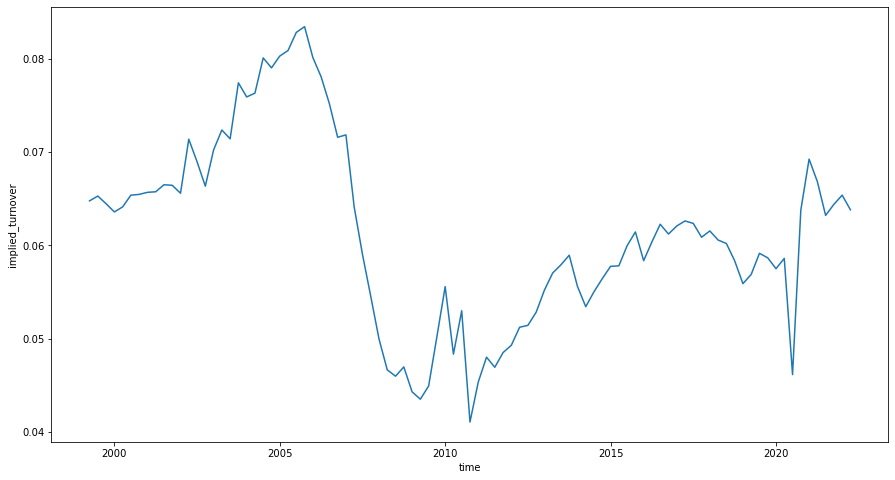

In [26]:
# Now let's plot the implied turnover from 1999 to the present:


sns.lineplot(x = "time", y = "implied_turnover",
             data = StockQuarterly)
plt.gcf().set_size_inches(15, 8)

In [40]:
StockQuarterly.implied_turnover = 100*StockQuarterly.implied_turnover

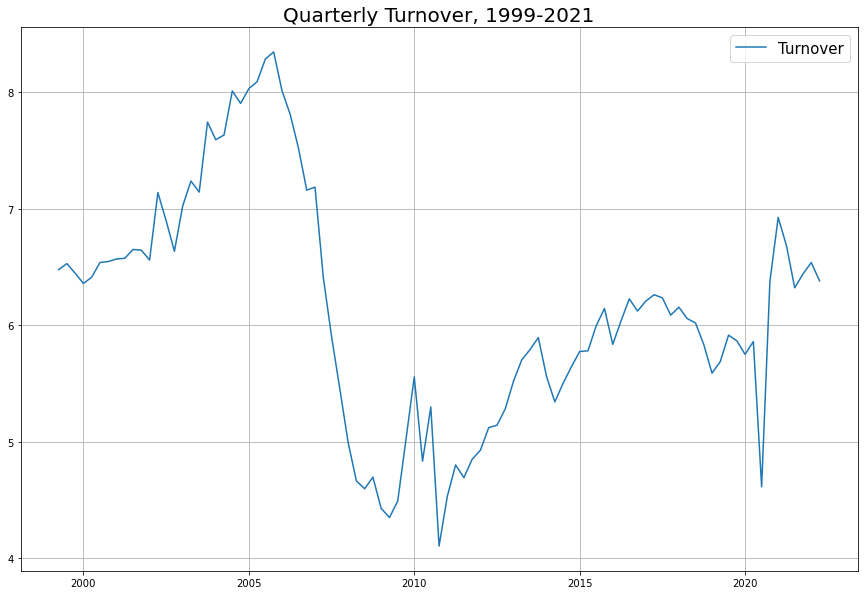

In [41]:
plt.figure(figsize=(15,10))
#plt.plot(HPI_PO.DATE, HPI_PO.YoY.values, label = "Yearly change in HPI (%)")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Turnover")
plt.legend(fontsize = 15)
plt.grid()
plt.title("Quarterly Turnover, 1999-2021", size = 20);

In [27]:
# now it is time to look at the HPU info

HPI = pd.read_csv('./HPI_Case_Shiller.csv')
print(HPI.info())
HPI.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          412 non-null    object 
 1   PresentHPI    412 non-null    float64
 2   LastYearsHPI  412 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.8+ KB
None


,DATE,PresentHPI,LastYearsHPI
0,1988-01-01,68.859,63.965
1,1988-02-01,69.263,64.424
2,1988-03-01,69.639,64.735
3,1988-04-01,69.977,65.132
4,1988-05-01,70.426,65.565
5,1988-06-01,70.888,66.073
6,1988-07-01,71.354,66.508
7,1988-08-01,71.799,66.939
8,1988-09-01,72.240,67.331
9,1988-10-01,72.636,67.739


In [28]:
# Now, let's convert the date to date.time 

HPI['DATE'] = pd.to_datetime(HPI['DATE'])
HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          412 non-null    datetime64[ns]
 1   PresentHPI    412 non-null    float64       
 2   LastYearsHPI  412 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.8 KB


In [29]:
# Now let's make month and year columns

HPI["Month"] = pd.to_datetime(HPI['DATE']).dt.month
HPI["Year"] = pd.to_datetime(HPI['DATE']).dt.year
HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          412 non-null    datetime64[ns]
 1   PresentHPI    412 non-null    float64       
 2   LastYearsHPI  412 non-null    float64       
 3   Month         412 non-null    int64         
 4   Year          412 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 16.2 KB


In [30]:
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year
0,1988-01-01,68.859,63.965,1,1988
1,1988-02-01,69.263,64.424,2,1988
2,1988-03-01,69.639,64.735,3,1988
3,1988-04-01,69.977,65.132,4,1988
4,1988-05-01,70.426,65.565,5,1988
...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021
408,2022-01-01,284.767,238.772,1,2022
409,2022-02-01,290.433,241.888,2,2022
410,2022-03-01,296.572,245.847,3,2022


In [31]:
#Now let's calculate the Year over Year percent change for HPI

HPI['YoYChange'] = HPI['PresentHPI']/HPI['LastYearsHPI'] - 1
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year,YoYChange
0,1988-01-01,68.859,63.965,1,1988,0.076511
1,1988-02-01,69.263,64.424,2,1988,0.075112
2,1988-03-01,69.639,64.735,3,1988,0.075755
3,1988-04-01,69.977,65.132,4,1988,0.074387
4,1988-05-01,70.426,65.565,5,1988,0.074140
...,...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021,0.188808
408,2022-01-01,284.767,238.772,1,2022,0.192631
409,2022-02-01,290.433,241.888,2,2022,0.200692
410,2022-03-01,296.572,245.847,3,2022,0.206328


In [32]:
# Now, let's make a time quantity so that we have a way to plot the time series:

HPI['time'] = HPI['Year'] + HPI['Month']/12
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year,YoYChange,time
0,1988-01-01,68.859,63.965,1,1988,0.076511,1988.083333
1,1988-02-01,69.263,64.424,2,1988,0.075112,1988.166667
2,1988-03-01,69.639,64.735,3,1988,0.075755,1988.250000
3,1988-04-01,69.977,65.132,4,1988,0.074387,1988.333333
4,1988-05-01,70.426,65.565,5,1988,0.074140,1988.416667
...,...,...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021,0.188808,2022.000000
408,2022-01-01,284.767,238.772,1,2022,0.192631,2022.083333
409,2022-02-01,290.433,241.888,2,2022,0.200692,2022.166667
410,2022-03-01,296.572,245.847,3,2022,0.206328,2022.250000


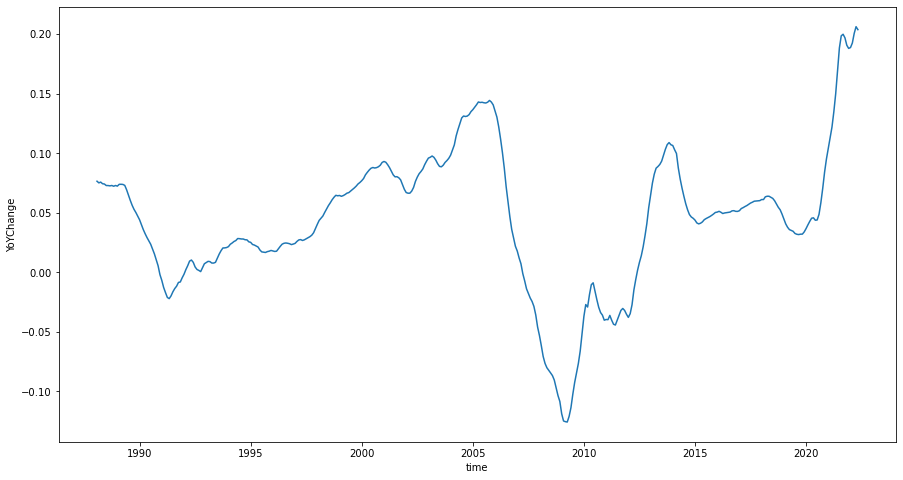

In [33]:
#This is a plot of the YoY HPI percent change from 1988-present, using Case Shiller

sns.lineplot(x = "time", y = "YoYChange",
             data = HPI)
plt.gcf().set_size_inches(15, 8)

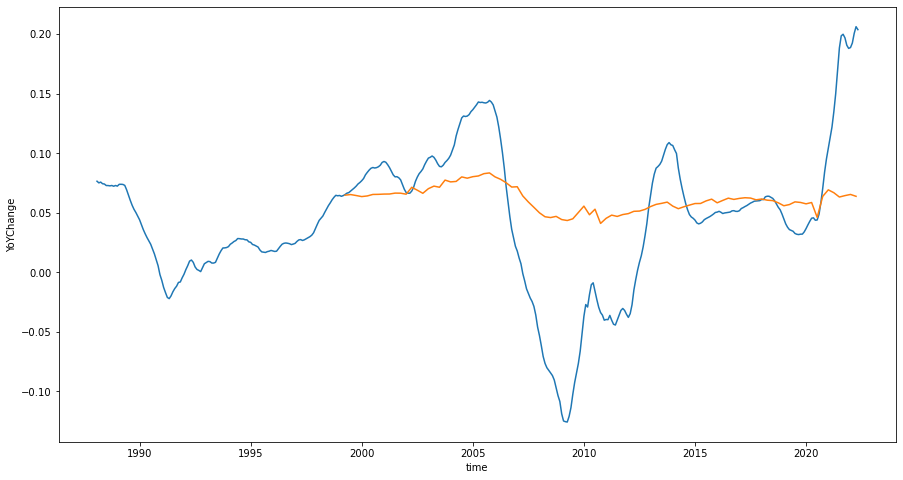

In [34]:
#Below plots the YoY  HPI change in blue from 1988-present using Case Shiller
#the orange plots the implied turnover from 1999-present

sns.lineplot(x = "time", y = "YoYChange",
             data = HPI)
sns.lineplot(x = "time", y = "implied_turnover",
             data = StockQuarterly)
plt.gcf().set_size_inches(15, 8)

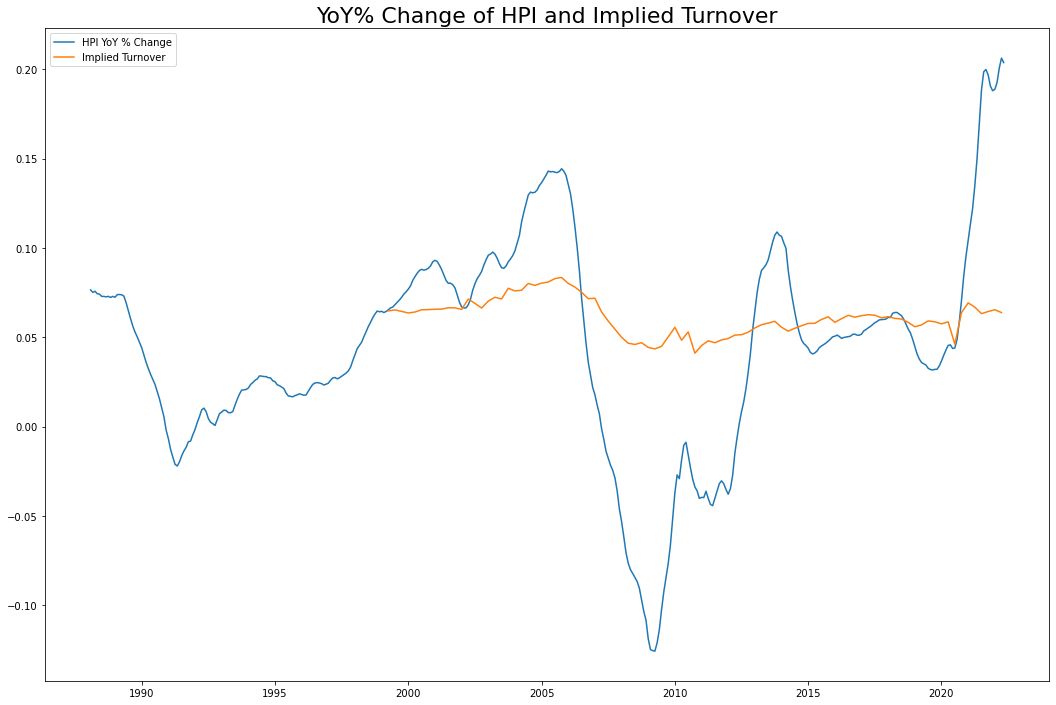

In [35]:
#Here I just play around with different plotting methods. 
#This is the same plot as above but it features a title and a legend

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY % Change")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("YoY% Change of HPI and Implied Turnover", size = 22)
plt.legend();

# Now I am going to make the same graphs, except  instead of using HPI from Case - Shiller, I will use the Purchase Only data

In [36]:
# Now let's do the same plots using HPI from Purchase Only:

HPI_PO = pd.read_csv('./HPI_Purchase_only.csv')
print(HPI_PO.info())
HPI_PO.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         376 non-null    object 
 1   HPIPONM226S  376 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB
None


,DATE,HPIPONM226S
0,1991-01-01,100.00
1,1991-02-01,100.46
2,1991-03-01,100.47
3,1991-04-01,100.34
4,1991-05-01,100.39
5,1991-06-01,100.52
6,1991-07-01,100.56
7,1991-08-01,100.39
8,1991-09-01,100.62
9,1991-10-01,100.94


In [37]:
# I want to get rid of the percentage signs in the last two columns

HPI_PO['YoYChange_not_seasonally_adjusted'] = HPI_PO['YoYChange_not_seasonally_adjusted'].str.rstrip("%").astype(float)/100
HPI_PO['YoYChange_seasonally_adjusted'] = HPI_PO['YoYChange_seasonally_adjusted'].str.rstrip("%").astype(float)/100
HPI_PO

KeyError: 'YoYChange_not_seasonally_adjusted'

In [ ]:
# Now let's make a time parameter for plotting the time series:

HPI_PO['time'] = HPI_PO['Year'] + HPI_PO['Quarter']/4
HPI_PO

In [ ]:
#Now, let's plot three different measures of HPI YoY % Change:

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.title("HPI YoY change from different sources", size = 22)
plt.legend();

In [ ]:
#Now let's look at the HPI from the Fred source

HPI_FHFA = pd.read_csv('./HPI_Fred.csv')
print(HPI_FHFA.info())
HPI_FHFA.head(15)

In [ ]:
#Let's change the date to .datetime
#LEt's make a year and a month and a time column
#Also, let's make YoY HPI % change

HPI_FHFA['DATE'] = pd.to_datetime(HPI_FHFA['DATE'])
HPI_FHFA["Month"] = pd.to_datetime(HPI_FHFA['DATE']).dt.month
HPI_FHFA["Year"] = pd.to_datetime(HPI_FHFA['DATE']).dt.year
HPI_FHFA["time"] = HPI_FHFA["Year"] + HPI_FHFA["Month"]/12
HPI_FHFA["YoY"] = HPI_FHFA["HPI"]/HPI_FHFA["Previous_HPI"] -1
HPI_FHFA

In [ ]:
# Now, let's plot YoY for the Fred data

sns.lineplot(x = "time", y = "YoY",
             data = HPI_FHFA)
plt.gcf().set_size_inches(15, 8)

In [ ]:
# Now let's plot all four HPI YoY % time series graphs

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_FHFA.time, HPI_FHFA.YoY, label = "HPI YoY FHFA")
plt.title("HPI YoY change from different sources", size = 22)
plt.legend();

In [ ]:
# Now let's plot all four HPI YoY % time series graphs Plus the implied turnover

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_FHFA.time, HPI_FHFA.YoY, label = "HPI YoY FHFA")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [ ]:
# There is one more data set from which to grab HPI data:

HPI_FHFA_PO = pd.read_csv('./HPI_FHFA_Purchase_Only.csv')
print(HPI_FHFA_PO.info())
HPI_FHFA_PO.head(15)

In [ ]:
# Now we convert to datetime, add month, year, time, and HPI YoY change:

HPI_FHFA_PO['DATE'] = pd.to_datetime(HPI_FHFA_PO['DATE'])
HPI_FHFA_PO["Month"] = pd.to_datetime(HPI_FHFA_PO['DATE']).dt.month
HPI_FHFA_PO["Year"] = pd.to_datetime(HPI_FHFA_PO['DATE']).dt.year
HPI_FHFA_PO['time'] =HPI_FHFA_PO['Year'] + HPI_FHFA_PO['Month']/12
HPI_FHFA_PO['HPI_YoY_Change'] = HPI_FHFA_PO['HPI']/HPI_FHFA_PO['Last_Years_HPI'] -1
HPI_FHFA_PO

In [ ]:
#Now, let's graph the time series for HPI YoY % change determined by FHFA Purchase only data

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shiller")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_FHFA.time, HPI_FHFA.YoY, label = "HPI YoY FHFA")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_Change, label = "HPI YoY FHFA Purchase Only")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [ ]:
#Moving forward, we will use the FHFA Purchase only HPI  and we will look at the implied turnover there:

plt.figure(figsize=(18,12))
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_Change, label = "HPI YoY FHFA Purchase Only")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [ ]:
# We want to take a moving average of the HPI YoY % change for the FHFA PO data

HPI_FHFA_PO

In [ ]:
#Make a column of zeros. This will serve as the three month average quantity

HPI_FHFA_PO['HPI_YoY_3mo'] = 0

In [ ]:
#Make the 3 month average quantity

for i in range(2,364):
    HPI_FHFA_PO['HPI_YoY_3mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i] + 
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1] + 
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2])/3

In [ ]:
#Make the 4 month average quantity

HPI_FHFA_PO['HPI_YoY_4mo'] = 0
for i in range(3,364):
    HPI_FHFA_PO['HPI_YoY_4mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3])/4
HPI_FHFA_PO

In [ ]:
#Make the 5 month average quantity

HPI_FHFA_PO['HPI_YoY_5mo'] = 0
for i in range(4,364):
    HPI_FHFA_PO['HPI_YoY_5mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-4])/5
HPI_FHFA_PO

In [ ]:
#Make the 6 month average quantity

HPI_FHFA_PO['HPI_YoY_6mo'] = 0
for i in range(5,364):
    HPI_FHFA_PO['HPI_YoY_6mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-4]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-5])/6
HPI_FHFA_PO

In [ ]:
#Make the 7 month average quantity

HPI_FHFA_PO['HPI_YoY_7mo'] = 0
for i in range(6,364):
    HPI_FHFA_PO['HPI_YoY_7mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-2]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-3]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-4]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-5]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-6])/7
HPI_FHFA_PO

In [ ]:
#Make the 2 month average quantity

HPI_FHFA_PO['HPI_YoY_2mo'] = 0
for i in range(1,364):
    HPI_FHFA_PO['HPI_YoY_2mo'][i] = (HPI_FHFA_PO['HPI_YoY_Change'][i]+
                                     HPI_FHFA_PO['HPI_YoY_Change'][i-1])/2
HPI_FHFA_PO

In [ ]:
#Let's plot the moving averages!
#There is a lot here. not much difference between a 3 momnth average and a 7 month average

plt.figure(figsize=(18,12))
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_Change, label = "HPI YoY unaveraged")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_2mo, label = "HPI YoY 2 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_3mo, label = "HPI YoY 3 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_4mo, label = "HPI YoY 4 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_5mo, label = "HPI YoY 5 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_6mo, label = "HPI YoY 6 month average")
plt.plot(HPI_FHFA_PO.time, HPI_FHFA_PO.HPI_YoY_7mo, label = "HPI YoY 7 month average")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [ ]:
# Now it's time to try to find a linear relationship between the moving average and implied turnover
#Let's look at how to put them into the same data frame

print(HPI_FHFA_PO)
StockQuarterly

In [ ]:
#I see that we will have to truncate convert the HPI data as well as take the average over quarters:
#First, truncate anything below 1998

HPI_FHFA_PO.drop(HPI_FHFA_PO.index[(HPI_FHFA_PO["Year"] <= 1998)],axis=0,inplace=True)
HPI_FHFA_PO

In [ ]:
#Let's add a column to HPI_FHFA_PO describing the quarter:
HPI_FHFA_PO['Q'] = np.ceil(HPI_FHFA_PO['Month']/3)
HPI_FHFA_PO

In [ ]:
#Additionally, let's toss the month of April 2022 because it is not accounted for in the quarterly data:

HPI_FHFA_PO = HPI_FHFA_PO.drop(labels=[363], axis=0)
HPI_FHFA_PO

In [ ]:
#Now, add to the fimplied turnover data the weighted average HPI YoY change
StockQuarterly['HPI_YoY_3mo'] = HPI_FHFA_PO.groupby(['Year', 'Q']).mean()['HPI_YoY_3mo'].tolist()

In [ ]:
#Check that it worked

StockQuarterly

In [ ]:
plt.figure(figsize=(18,12))
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.plot(StockQuarterly.time, StockQuarterly.HPI_YoY_3mo, label = "HPI YoY % change")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();

In [ ]:
# Now, let's make a scatter plot in which each point is a quarter, and 
#we will plot the implied turnover versus the HPI % change

sns.scatterplot(data=StockQuarterly, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

In [ ]:
lm = sm.OLS.from_formula('implied_turnover ~ HPI_YoY_3mo', StockQuarterly)
result = lm.fit()
result.summary()

In [ ]:
sns.regplot(StockQuarterly['HPI_YoY_3mo'], StockQuarterly['implied_turnover'])

In [ ]:
StockQuarterly['adjusted'] = np.log(1+3*StockQuarterly['implied_turnover']-.18)

In [ ]:
StockQuarterly

In [ ]:
sns.regplot(StockQuarterly['HPI_YoY_3mo'], StockQuarterly['adjusted'])

In [ ]:
logmodel = sm.OLS.from_formula('adjusted ~ HPI_YoY_3mo', StockQuarterly)
result = logmodel.fit()
result.summary()

In [ ]:
#Let's make a new data frame from StockQuarterly

TurnoverHPA_pre2020 = StockQuarterly.drop(StockQuarterly.index[(StockQuarterly["Year"] >= 2020)],axis=0)
sns.scatterplot(data=TurnoverHPA_pre2020, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

In [ ]:
sns.regplot(TurnoverHPA_pre2020['HPI_YoY_3mo'], TurnoverHPA_pre2020['implied_turnover'])

In [ ]:
lm = sm.OLS.from_formula('implied_turnover ~ HPI_YoY_3mo', TurnoverHPA_pre2020)
result = lm.fit()
result.summary()

In [ ]:
TurnoverHPA_pre2020_no_neg = TurnoverHPA_pre2020.drop(TurnoverHPA_pre2020.index[(TurnoverHPA_pre2020["HPI_YoY_3mo"] <= 0)],axis=0)
sns.scatterplot(data=TurnoverHPA_pre2020_no_neg, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

In [ ]:
sns.regplot(TurnoverHPA_pre2020_no_neg['HPI_YoY_3mo'], TurnoverHPA_pre2020_no_neg['implied_turnover'])

In [ ]:
logmodel = sm.OLS.from_formula('adjusted ~ HPI_YoY_3mo', TurnoverHPA_pre2020_no_neg)
result = logmodel.fit()
result.summary()

In [ ]:
TurnoverHPA_pre2020_no_pos = TurnoverHPA_pre2020.drop(TurnoverHPA_pre2020.index[(TurnoverHPA_pre2020["HPI_YoY_3mo"] >= 0)],axis=0)
sns.scatterplot(data=TurnoverHPA_pre2020_no_pos, x="HPI_YoY_3mo", y="implied_turnover", hue = "Year")

In [ ]:
sns.regplot(TurnoverHPA_pre2020_no_pos['HPI_YoY_3mo'], TurnoverHPA_pre2020_no_pos['implied_turnover'])

In [ ]:
logmodel = sm.OLS.from_formula('adjusted ~ HPI_YoY_3mo', TurnoverHPA_pre2020_no_pos)
result = logmodel.fit()
result.summary()